In [1]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')
import matplotlib.ticker as ticker
from PIL import Image
import urllib

In [63]:
df = pd.read_csv("LodeiroRusnak.csv").dropna()
df = df.filter(regex='^(?!Expected).*')
df = df.filter(regex='^(?!Corner).*')
df = df.filter(regex='^(?!90).*')

In [64]:
df.columns

Index(['Player', 'Span', 'Squad', 'TotalCmp', 'TotalAtt', 'TotalCmp%',
       'TotalTotDist', 'TotalPrgDist', 'ShortCmp', 'ShortAtt', 'ShortCmp%',
       'MediumCmp', 'MediumAtt', 'MediumCmp%', 'LongCmp', 'LongAtt',
       'LongCmp%', 'Ast', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog',
       'Pass TypesLive', 'Pass TypesDead', 'Pass TypesFK', 'Pass TypesTB',
       'Pass TypesPress', 'Pass TypesSw', 'Pass TypesCrs', 'Pass TypesCK',
       'HeightGround', 'HeightLow', 'HeightHigh', 'OutcomesCmp', 'OutcomesOff',
       'OutcomesOut', 'OutcomesInt', 'OutcomesBlocks', 'TacklesTkl',
       'TacklesTklW', 'TacklesDef 3rd', 'TacklesMid 3rd', 'TacklesAtt 3rd',
       'Vs DribblesTkl', 'Vs DribblesAtt', 'Vs DribblesTkl%',
       'Vs DribblesPast', 'PressuresPress', 'PressuresSucc', 'Pressures%',
       'PressuresDef 3rd', 'PressuresMid 3rd', 'PressuresAtt 3rd',
       'BlocksBlocks', 'BlocksSh', 'BlocksShSv', 'BlocksPass', 'Int',
       'Tkl+Int', 'Clr', 'TouchesTouches', 'TouchesDef Pen', 'TouchesDef

In [58]:
df

,Player,Span,Squad,90s,TotalCmp,TotalAtt,TotalCmp%,TotalTotDist,TotalPrgDist,ShortCmp,...,StandardFK,StandardPK,StandardPKatt,Per 90 MinutesG-PK,Per 90 MinutesPK,Per 90 MinutesPKatt,Per 90 MinutesCrdY,Per 90 MinutesCrdR,Per 90 MinutesG+A-PK,Per 90 MinutesxA
0,Albert Rusnák,2021,Real Salt Lake,33.8,40.7,48.7,83.6,839.3,226.9,16.4,...,0.12,0.09,0.09,0.24,0.09,0.09,0.18,0,0.44,0.21
1,Nicolás Lodeiro,2022,Seattle,19.7,61.2,76.4,80.1,1104.2,356.9,28.2,...,0.20,0.20,0.20,0.05,0.20,0.20,0.25,0,0.35,0.27


In [114]:
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams.update({'font.size': 15})
cols = df.columns
cols = ['Ast', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog',
       'TacklesTkl',
       'Pressures%','Int',
       'DribblesSucc%', 'StandardSoT%', 'StandardSh/90']
rusStats = []
lodStats = []
colStats = []
for i in range(len(cols)):
    if isinstance(df[cols[i]][0], (int, float)):
        dif = (df[cols[i]][0]-df[cols[i]][1])*100/df[cols[i]].sum()
        if (dif<-5):# and (df[cols[i]][0]>5):
            if ("%" in cols[i]):
                rusStats.append(df[cols[i]][0]/100)
                lodStats.append(df[cols[i]][1]/100)
                colStats.append(cols[i])
                #plt.bar(cols[i],df[cols[i]][0]/100, color="blue")
                #plt.bar(cols[i],df[cols[i]][1]/100, color="green")
            else:
                rusStats.append(df[cols[i]][0])
                lodStats.append(df[cols[i]][1])
                colStats.append(cols[i])
#                plt.bar(cols[i],df[cols[i]][0], color="blue")
#                plt.bar(cols[i],df[cols[i]][1], color="green")

print(colStats)

['Ast', '1/3', 'PPA', 'CrsPA', 'Prog', 'TacklesTkl', 'Int']


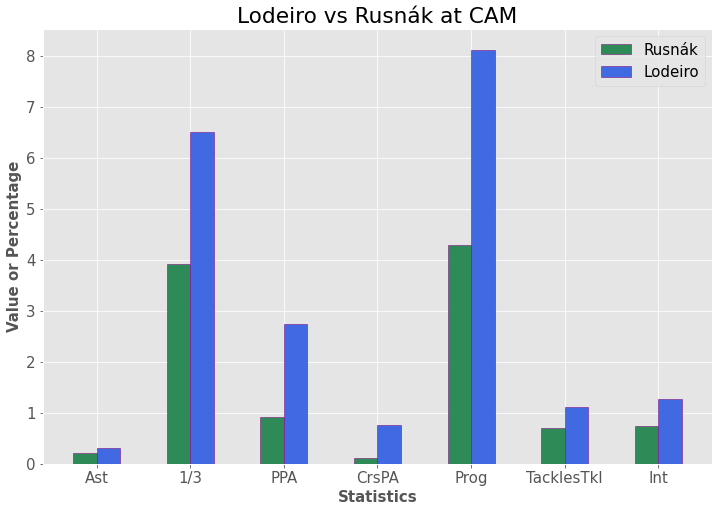

In [115]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
#colStats = ["KP", "Pressures %", "Dribble %", "Carries into Box", "SoT%", "Shots/90"]
# set height of bar
IT = [12, 30, 1, 8, 22]
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]

# Set position of bar on X axis
br1 = np.arange(len(rusStats))
br2 = [x + barWidth for x in br1]
#br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, rusStats, color ='seagreen', width = barWidth,
		edgecolor ='purple', label ='Rusnák')
plt.bar(br2, lodStats, color ='royalblue', width = barWidth,
		edgecolor ='purple', label ='Lodeiro')
#plt.bar(br3, CSE, color ='b', width = barWidth,
#		edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('Statistics', fontweight ='bold', fontsize = 15)
plt.ylabel('Value or Percentage', fontweight ='bold', fontsize = 15)
plt.title("Lodeiro vs Rusnák at CAM")
plt.xticks([r + barWidth/2 for r in range(len(rusStats))], colStats)
#		['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show()


In [55]:
for a in range(len(df.columns)):
    print(df.columns[a])

Player
Span
Nation
Pos
Squad
90s
TotalCmp
TotalAtt
TotalCmp%
TotalTotDist
TotalPrgDist
ShortCmp
ShortAtt
ShortCmp%
MediumCmp
MediumAtt
MediumCmp%
LongCmp
LongAtt
LongCmp%
Ast
xA
A-xA
KP
44564
PPA
CrsPA
Prog
Pass TypesLive
Pass TypesDead
Pass TypesFK
Pass TypesTB
Pass TypesPress
Pass TypesSw
Pass TypesCrs
Pass TypesCK
HeightGround
HeightLow
HeightHigh
Body PartsLeft
Body PartsRight
Body PartsHead
Body PartsTI
Body PartsOther
OutcomesCmp
OutcomesOff
OutcomesOut
OutcomesInt
OutcomesBlocks
TacklesTkl
TacklesTklW
TacklesDef 3rd
TacklesMid 3rd
TacklesAtt 3rd
Vs DribblesTkl
Vs DribblesAtt
Vs DribblesTkl%
Vs DribblesPast
PressuresPress
PressuresSucc
Pressures%
PressuresDef 3rd
PressuresMid 3rd
PressuresAtt 3rd
BlocksBlocks
BlocksSh
BlocksShSv
BlocksPass
Int
Tkl+Int
Clr
TouchesTouches
TouchesDef Pen
TouchesDef 3rd
TouchesMid 3rd
TouchesAtt 3rd
TouchesAtt Pen
TouchesLive
DribblesSucc
DribblesAtt
DribblesSucc%
Dribbles#Pl
DribblesMegs
CarriesCarries
CarriesTotDist
CarriesPrgDist
CarriesProg
Carri